# Python ile Sosyal Ag Analizi II
Networku Olusturmak

> Bu calisma Uzay Cetin tarafindan, Uskudar Amerikan Lisesi CodeFest 2018 (https://www.codefesttr.org) icin hazirlanmistir. 

NetworkX version: 2.0 gereklidir.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## Derece buyuklugune gore cizim

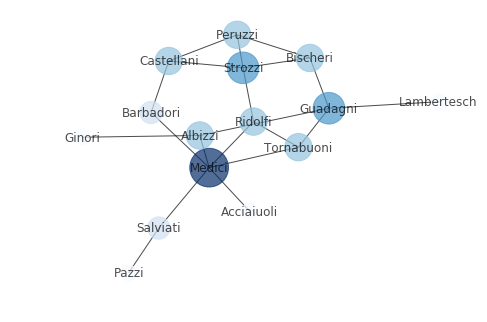

In [3]:
G = nx.florentine_families_graph()
buyukluk = [250 * G.degree(v) for v in G]
nx.draw(G, node_size=buyukluk,
        alpha = 0.7,
        node_color = buyukluk,
        cmap = plt.cm.Blues,
        with_labels=True)

In [4]:
G.degree

DegreeView({'Acciaiuoli': 1, 'Medici': 6, 'Castellani': 3, 'Peruzzi': 3, 'Strozzi': 4, 'Barbadori': 2, 'Ridolfi': 3, 'Tornabuoni': 3, 'Albizzi': 3, 'Salviati': 2, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 4, 'Ginori': 1, 'Lamberteschi': 1})

In [5]:
max(G, key=G.degree)

'Medici'

In [6]:
list(G.neighbors('Medici'))

['Acciaiuoli', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati']

In [7]:
G['Medici']

AtlasView({'Acciaiuoli': {}, 'Barbadori': {}, 'Ridolfi': {}, 'Tornabuoni': {}, 'Albizzi': {}, 'Salviati': {}})

In [8]:
list(nx.all_simple_paths(G, 'Medici', 'Castellani'))[:3]

[['Medici', 'Barbadori', 'Castellani'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Castellani'],
 ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi', 'Castellani']]

### Soru 1: 'Medici', 'Castellani' arasindaki baglantilari yazin

In [9]:
yol = nx.shortest_path(G, 'Medici', 'Castellani')
yol

['Medici', 'Barbadori', 'Castellani']

In [10]:
# list(zip(yol[:-1], yol[1:]))

In [11]:
pos_fr = nx.fruchterman_reingold_layout(G)
kirmizi = list(zip(yol[:-1], yol[1:]))
kirmizi

[('Medici', 'Barbadori'), ('Barbadori', 'Castellani')]

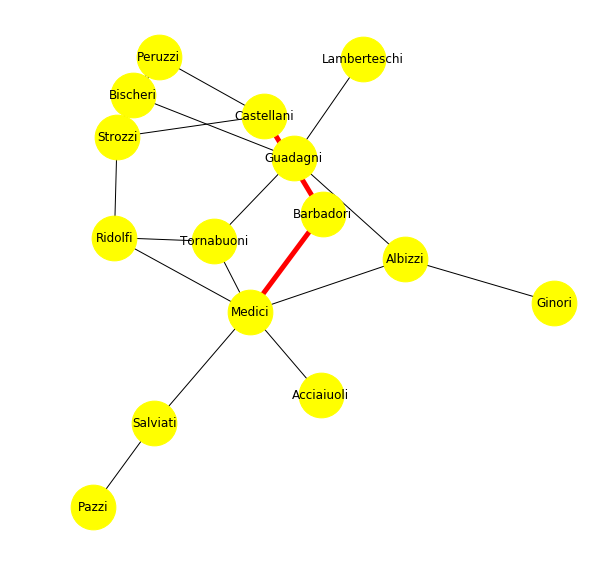

In [12]:
plt.figure(figsize=(10,10))
# Plot nodes
nx.draw_networkx_nodes(G, pos=pos_fr, node_size=2000, node_color='yellow')
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr)
# Plot edges 
nx.draw_networkx_edges(G, pos=pos_fr)
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=kirmizi, width=5, edge_color='red')
# Remove axes
ax = plt.gca()
ax.set_axis_off()

In [13]:
nx.diameter(G)

5

## Soru 2 :  Birden fazla yolu farkli cizen bir program yazin

In [14]:
def yollari_ciZ(G, yollar):
    pass

In [15]:
def yollari_ciz(G, yollar): 
    plt.figure(figsize=(10,10))
    pos_fr = nx.fruchterman_reingold_layout(G)
    # Plot nodes
    nx.draw_networkx_nodes(G, pos=pos_fr, node_size=2000, node_color='yellow')
    # Plot node labels
    nx.draw_networkx_labels(G, pos=pos_fr)
    # Plot edges 
    nx.draw_networkx_edges(G, pos=pos_fr)
    for yol in yollar:
        kirmizi = list(zip(yol[:-1], yol[1:]))
        nx.draw_networkx_edges(G, pos=pos_fr, edgelist=kirmizi, width=5, edge_color='red')
    # Remove axes
    ax = plt.gca()
    ax.set_axis_off()

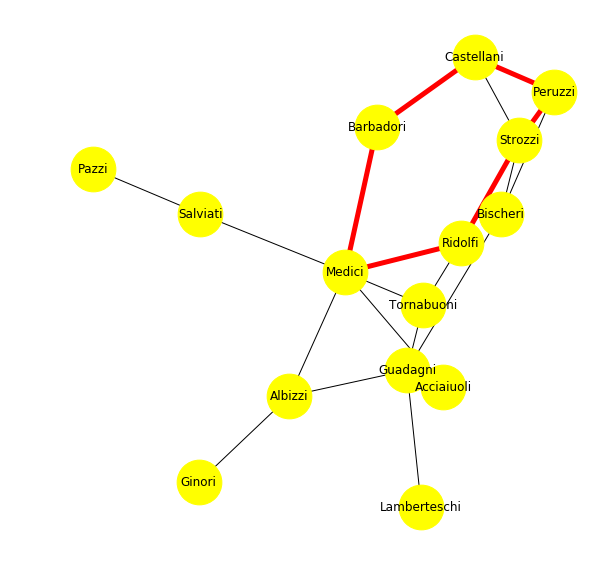

In [16]:
source, target = 'Medici', 'Peruzzi'
yollari_ciz(G, nx.all_shortest_paths(G, source, target))

In [17]:
for yol in nx.all_shortest_paths(G, source, target):
    print(yol)

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']
['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']


## Merkezilik Ölçümleri

__Arasindalik__ : en kisa yollarin kaci o dugum uzerinden geciyor.

In [46]:
merkezilik = nx.betweenness_centrality(G)
merkezilik

{'Acciaiuoli': 0.0,
 'Albizzi': 0.21245421245421245,
 'Barbadori': 0.09340659340659341,
 'Bischeri': 0.1043956043956044,
 'Castellani': 0.05494505494505495,
 'Ginori': 0.0,
 'Guadagni': 0.2545787545787546,
 'Lamberteschi': 0.0,
 'Medici': 0.521978021978022,
 'Pazzi': 0.0,
 'Peruzzi': 0.02197802197802198,
 'Ridolfi': 0.11355311355311355,
 'Salviati': 0.14285714285714288,
 'Strozzi': 0.10256410256410257,
 'Tornabuoni': 0.09157509157509157}

In [47]:
[1000 * v for v in merkezilik.values()]

[0.0,
 521.978021978022,
 54.94505494505495,
 21.978021978021978,
 102.56410256410257,
 93.4065934065934,
 113.55311355311355,
 91.57509157509156,
 212.45421245421244,
 142.8571428571429,
 0.0,
 104.3956043956044,
 254.57875457875463,
 0.0,
 0.0]

#### Merkezilik Degerine Gore Dugum buyuklugunu cizen bir fonksiyon yazin.

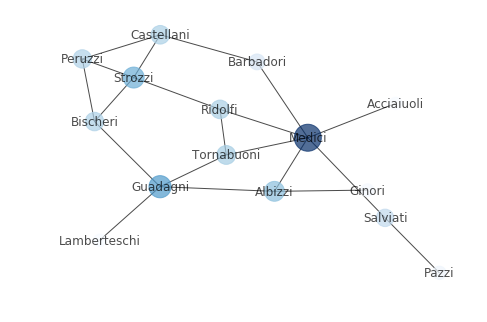

In [66]:
def ciz_merkezilige_gore(G, merkezilik):
    buyukluk = [5000 * v for v in merkezilik.values()]
    nx.draw(G, node_size=buyukluk,
            alpha = 0.7,
            node_color = buyukluk,
            cmap = plt.cm.Blues,
            with_labels=True)
    
ciz_merkezilige_gore(G, merkezilik)

### pagerank
Baglantili oldugunuz dugumler ne kadar onemliyse siz de o kadar onemlisiniz.

In [49]:
merkezilik = nx.pagerank(G)
merkezilik

{'Acciaiuoli': 0.03065721480230426,
 'Albizzi': 0.079121502380729,
 'Barbadori': 0.050300712744633685,
 'Bischeri': 0.0688615381141211,
 'Castellani': 0.06933028447008721,
 'Ginori': 0.032418257716596434,
 'Guadagni': 0.09839859717156552,
 'Lamberteschi': 0.03090932465499793,
 'Medici': 0.14581844065218275,
 'Pazzi': 0.036054222996734095,
 'Peruzzi': 0.06787531774407572,
 'Ridolfi': 0.069574170990148,
 'Salviati': 0.061302640987807314,
 'Strozzi': 0.08809849082725613,
 'Tornabuoni': 0.07127928374676082}

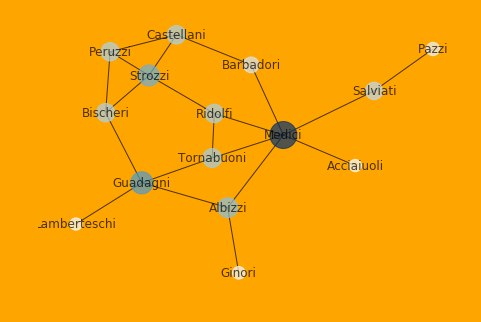

In [60]:
# Custom the nodes:
fig = plt.figure()
ciz_merkezilige_gore(G, merkezilik)
fig.set_facecolor("orange")
 
# If you want to save the figure to png:
# plt.savefig('yourname.png', facecolor=fig.get_facecolor() )


In [57]:
nx.hits(G)

({'Acciaiuoli': 0.03773016295663445,
  'Albizzi': 0.06964967557693015,
  'Barbadori': 0.060442028281496134,
  'Bischeri': 0.08073966387719109,
  'Castellani': 0.07395218971573315,
  'Ginori': 0.02139049633558931,
  'Guadagni': 0.08254274780976245,
  'Lamberteschi': 0.025350159143010035,
  'Medici': 0.12285332444677545,
  'Pazzi': 0.012794273802518111,
  'Peruzzi': 0.07872125477183611,
  'Ridolfi': 0.09751356870046084,
  'Salviati': 0.04165948305148293,
  'Strozzi': 0.10163271895526947,
  'Tornabuoni': 0.09302825257531028},
 {'Acciaiuoli': 0.03773016279740683,
  'Albizzi': 0.06964967526423493,
  'Barbadori': 0.060442028119109405,
  'Bischeri': 0.08073966375591989,
  'Castellani': 0.07395218978111072,
  'Ginori': 0.021390496471446828,
  'Guadagni': 0.0825427481675442,
  'Lamberteschi': 0.02535015903383661,
  'Medici': 0.12285332497049127,
  'Pazzi': 0.012794273883214672,
  'Peruzzi': 0.078721254820009,
  'Ridolfi': 0.09751356863073661,
  'Salviati': 0.041659482865970834,
  'Strozzi': 0.1

### Arasindalik degeri en yuksek kisiyi bulalim

In [62]:
betweeness = nx.betweenness_centrality(G)
betweeness

{'Acciaiuoli': 0.0,
 'Albizzi': 0.21245421245421245,
 'Barbadori': 0.09340659340659341,
 'Bischeri': 0.1043956043956044,
 'Castellani': 0.05494505494505495,
 'Ginori': 0.0,
 'Guadagni': 0.2545787545787546,
 'Lamberteschi': 0.0,
 'Medici': 0.521978021978022,
 'Pazzi': 0.0,
 'Peruzzi': 0.02197802197802198,
 'Ridolfi': 0.11355311355311355,
 'Salviati': 0.14285714285714288,
 'Strozzi': 0.10256410256410257,
 'Tornabuoni': 0.09157509157509157}

In [63]:
max(betweeness.keys(), key=lambda x:betweeness[x])

'Medici'

#### Soru: Closeness degeri en yuksek kisiyi bulan bir fonksiyon yazalim


In [64]:
def en_yakin(G):
    closeness = nx.closeness_centrality(G)
    return max(closeness.keys(), key=lambda x:closeness[x])

en_yakin(G)

'Medici'

#### Soru: Pagerank degeri en yuksek 5 kisiyi bulan bir fonksiyon yazalim


In [65]:
def pagerank_top_n(G, n = 5):
    pr = nx.pagerank(G, alpha=0.85)
    return sorted(pr.keys(), key=lambda key:pr[key], reverse=True)[:n]
pagerank_top_n(G)

['Medici', 'Guadagni', 'Strozzi', 'Albizzi', 'Tornabuoni']